In [2]:
import numpy as np
from matplotlib import pyplot as plt

In [3]:
def degrees_to_radian(angle):
    return angle / 360 * 2 * np.pi


def common_parameters(k, alpha_0, r_0, alpha, R):
    alpha_0 = degrees_to_radian(alpha_0)
    alpha = degrees_to_radian(alpha)
    c_1 = (k * r_0) ** 2
    c_2 = 2 * k * r_0 * np.tan(alpha_0)
    c_3 = np.tan(alpha) ** 2
    L = (1 / (2 * c_3)) * np.sqrt(
        c_2**2 - 4 * c_3 * (c_1 - (R + r_0 * (k - 1)) ** 2)
    ) - c_2
    return c_1, c_2, c_3, L


def Xt(
    t,
    k,
    alpha_0,
    r_0,
    alpha,
    q,
    r,
    m,
    b,
    R,
):
    c_1, c_2, c_3, L = common_parameters(k, alpha_0, r_0, alpha, R)
    x_1 = L * (np.sqrt(r**2 + m**2) - np.sqrt(r**2 + (t - m) ** 2))
    x_2 = b * L * (np.sqrt(r**2 + (1 - m) ** 2) - np.sqrt(r**2 + m**2)) * t**2
    return x_1 + x_2


def Yt(
    t,
    k,
    alpha_0,
    r_0,
    alpha,
    q,
    r,
    m,
    b,
    R,
):
    c_1, c_2, c_3, L = common_parameters(k, alpha_0, r_0, alpha, R)
    y_1 = np.sqrt(c_1 + c_2 * L * t + c_3 * (L * t) ** 2) + r_0 * (1 - k)
    y_2 = R + L * (1 - np.sqrt(1 + c_3 * (t - 1) ** 2))
    return (1 - t**q) * y_1 + (t**q) * y_2

Vertical curve

In [4]:
t1 = 0.0
t2 = 0.90
t = np.linspace(t1, t2, 100)

In [5]:
R = 500
alpha = 20
r_0 = 17.9
alpha_0 = 23

m = 0.8
r = 0.5
q = 2.9
k = 1.3
b = 0.3

vx = Xt(t=t, k=k, alpha_0=alpha_0, r_0=r_0, alpha=alpha,q=q,r=r,m=m,b=b,R=R)
vy = Yt(t=t,k=k,alpha_0=alpha_0,r_0=r_0,alpha=alpha,q=q,r=r,m=m,b=b,R=R)

Horizontal

In [6]:
R = 700
alpha = 35
r_0 = 17.9
alpha_0 = 23

m = 0.8
r = 0.5
q = 2.9
k = 1.3
b = 0.3


hx = Xt(t=t,k=k,alpha_0=alpha_0,r_0=r_0,alpha=alpha, q=q, r=r, m=m, b=b, R=R)
hy = Yt(t=t,k=k,alpha_0=alpha_0,r_0=r_0,alpha=alpha,q=q,r=r,m=m,b=b,R=R)

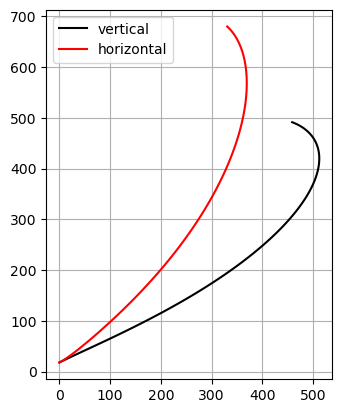

In [7]:
%matplotlib inline


plt.plot(vx, vy, 'k', label="vertical")
plt.plot(hx, hy, 'r', label="horizontal")
plt.grid()
ax = plt.gca()
ax.set_aspect("equal")
plt.legend()
plt.draw()
plt.show()

In [8]:
def calc_mouth_area_from_throat_distance(
    distance_from_throat: float, h_rosse_x: np.ndarray, h_rosse_y: np.ndarray, v_rosse_x: np.ndarray, v_rosse_y: np.ndarray
) -> float:
    difference_array_h = np.absolute(h_rosse_x - distance_from_throat)
    difference_array_v = np.absolute(v_rosse_x - distance_from_throat)
    index_h = difference_array_h.argmin()
    index_v = difference_array_v.argmin()
    radius_h = h_rosse_y[index_h] / 10 
    radius_v = v_rosse_y[index_v] / 10
    return np.pi * radius_h * radius_v

In [9]:
def calc_hornresp_values(
    entry_points: list[float], h_rosse_x: np.ndarray, h_rosse_y: np.ndarray, v_rosse_x: np.ndarray, v_rosse_y: np.ndarray
):
    input_hornresp = []
    for i in range(1, len(entry_points)):
        area_n_1 = calc_mouth_area_from_throat_distance(
            entry_points[i - 1], h_rosse_x, h_rosse_y, v_rosse_x, v_rosse_y
        )
        area_n = calc_mouth_area_from_throat_distance(entry_points[i], h_rosse_x, h_rosse_y, v_rosse_x, v_rosse_y)
        diff = (entry_points[i] - entry_points[i - 1])/10
        rule = {f"S{i}": area_n_1, f"S{i+1}": area_n, "Con": diff }
        input_hornresp.append(rule)
    return input_hornresp

In [20]:
entry_points = [0, 40, 70, 290, 410]

In [21]:
calc_hornresp_values(entry_points, vx, vy, hx, hy)

[{'S1': 10.065977021367054, 'S2': 51.92892984471506, 'Con': 4.0},
 {'S2': 51.92892984471506, 'S3': 110.92324180310344, 'Con': 3.0},
 {'S3': 110.92324180310344, 'S4': 1721.632478977937, 'Con': 22.0},
 {'S4': 1721.632478977937, 'S5': 4521.884940996687, 'Con': 12.0}]